In [1]:
# this code is written by Changyi Yang used for DS Discovery program

import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
torch. __version__

'1.13.1'

In [3]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/Shareddrives/PebbleReactorProject/Data

In [4]:
# define the dataset classes
from sklearn.preprocessing import StandardScaler, MinMaxScaler


class ReactorData(Dataset):
    def __init__(self,file_name, sequence_length, start_percent = 0, end_percent = 1):
        data = pd.read_csv(file_name, skiprows=[0]) # skip the first line
        
        length = data.shape[0]
        data = data[ int(length * start_percent)  : int(length * end_percent)]
        
        # print(data.shape)
        
        
        self.labels = data.iloc[:, -1:]
        self.data = data.iloc[:, 1:-1] # skip the first time column
        
        mm = MinMaxScaler()
        ss = StandardScaler()


        self.data = ss.fit_transform(self.data)
        self.labels = mm.fit_transform(self.labels) 
        
        self.sequence_length = sequence_length
        
    def __len__(self):
        return len(self.labels)//self.sequence_length
    
    def __getitem__(self,idx):
        idx = idx * self.sequence_length
        
        return (torch.tensor(self.data[idx : idx+ self.sequence_length])).double(), \
    (torch.tensor(self.labels[idx : idx+ self.sequence_length])).double()

        

/Users/Vaibhav/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
# load the data
training_data = ReactorData('fluence.csv', sequence_length= 10, start_percent= 0, end_percent= 0.75)
testing_data = ReactorData('fluence.csv', sequence_length= 10, start_percent= 0.75, end_percent= 1)


In [6]:
print(training_data[0][0])

tensor([[ 5.9933, -0.0986, -0.0830,  ..., -0.1448,  0.0000, -0.0830],
        [ 5.5764,  2.4102, -0.0830,  ..., -0.1448,  0.0000, -0.0830],
        [-2.7128, 11.7810, 12.0416,  ..., -0.1448,  0.0000, -0.0830],
        ...,
        [-1.8544, -0.0986, -0.0830,  ..., -0.1448,  0.0000, -0.0830],
        [-1.5724, -0.0986, -0.0830,  ..., -0.1448,  0.0000, -0.0830],
        [-1.4988, -0.0986, -0.0830,  ..., -0.1448,  0.0000, -0.0830]],
       dtype=torch.float64)


In [7]:
# print(training_data[0][1])
# print(training_data[0][0].shape)
# print(training_data[0][1].shape)

# print(len(training_data[0]))
# print(len(training_data))

In [8]:
# define the neural nets
class SimpleLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, lstm_nums_layer, dropout):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        
        self.LSTM = nn.LSTM(input_dim, hidden_dim, lstm_nums_layer, batch_first = True)
        self.dropout = nn.Dropout(dropout)
        
        self.hidden_to_output = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, input):
        # print(input.shape)
        
        hidden_state, _ = self.LSTM(input)
        
        # print(hidden_state.shape)
        output = self.dropout(hidden_state)
        output = self.hidden_to_output(output)
        
        
        return output
    
    


In [9]:
!pip install keras
!pip install tensorflow

In [10]:
df = pd.read_csv('fluence.csv')

In [11]:
# train the model

input_dim = training_data[0][0].shape[1]
output_dim = training_data[0][1].shape[1]


# print(output_dim)

# some adjustable hyper-parameters
hidden_dim = 64
num_hidden_layers = 1
batch_size = 5
learning_rate = 1e-3
weight_decay = 1e-5
epoch_num = 200
dropout = 0.2

model = SimpleLSTM(input_dim, hidden_dim, output_dim, num_hidden_layers, dropout)
model = model.double()

train_dataloader = DataLoader(training_data, batch_size = batch_size)


# the chosn loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay= weight_decay)



for epoch in range(epoch_num):
    
    for batch, (X, y) in enumerate(train_dataloader):
        

        
        model.zero_grad()
        
        pred = model(X)
        
        # print(X.shape)
        # print(y.shape)
        
        loss = loss_fn(pred, y)
        
        # backpropagation
        
        loss.backward()
        optimizer.step()
        
        loss = loss.item()
        
    if epoch % 5 == 0:
        print("The loss is {} in epoch {}".format(loss ,epoch))
            

print(f"The training is ended, the final loss is {loss}.")
print("Bye")

The loss is 0.4741278878859207 in epoch 0
The loss is 0.060918635377965824 in epoch 5
The loss is 0.0257647302116693 in epoch 10
The loss is 0.014839680283542777 in epoch 15
The loss is 0.012810768025059538 in epoch 20
The loss is 0.008525829763014322 in epoch 25
The loss is 0.012795091216775212 in epoch 30
The loss is 0.005972883333127075 in epoch 35
The loss is 0.006935240017044229 in epoch 40
The loss is 0.0072547229908725835 in epoch 45
The loss is 0.0067996890680246756 in epoch 50
The loss is 0.006364915078646796 in epoch 55
The loss is 0.006460491566537077 in epoch 60
The loss is 0.005538510238744782 in epoch 65
The loss is 0.007245288119775896 in epoch 70
The loss is 0.003968079697498515 in epoch 75
The loss is 0.004206386167639121 in epoch 80
The loss is 0.005624800863186147 in epoch 85
The loss is 0.00558779293005506 in epoch 90
The loss is 0.0056405970150403256 in epoch 95
The loss is 0.003993207338370553 in epoch 100
The loss is 0.0044105689088199205 in epoch 105
The loss is

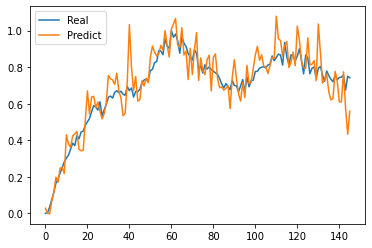

In [12]:
# visualize the training output

import matplotlib.pyplot as plt


X_train = (torch.tensor(training_data.data)).double()
y_train = (torch.tensor(training_data.labels)).double()


plt.figure()
plt.plot(y_train, label = "Real")     
plt.plot(model(X_train).detach().numpy(), label = "Predict")
plt.legend()


0.09721748329087572


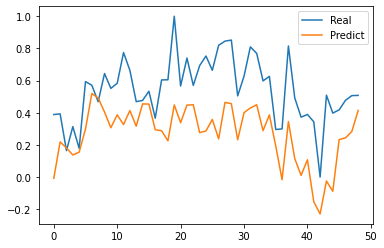

In [13]:
# visualize the test output

import matplotlib.pyplot as plt


X_test = (torch.tensor(testing_data.data)).double()
y_test = (torch.tensor(testing_data.labels)).double()

y_pred = model(X_test)

loss = nn.MSELoss()
print(loss(y_pred, y_test).item())

plt.figure()
plt.plot(y_test, label = "Real")     
plt.plot(y_pred.detach().numpy(), label = "Predict")
plt.legend()

In [14]:
# Define the hyperparameter search space
from ray import tune

config_space = {
    "hidden_size": tune.choice([64, 128, 256]),
    "num_layers": tune.choice([1, 2, 3]),
    "dropout": tune.uniform(0.1, 0.5),
    "lr": tune.loguniform(1e-4, 1e-1),
    "num_epochs": 10
}

# Launch the Ray Tune experiment
analysis = tune.run(
    model,
    config=config_space,
    num_samples=10,
    search_alg=tune.suggest.hyperopt,
    metric="mean_accuracy",
    mode="max"
)

AttributeError: module 'ray.tune' has no attribute 'suggest'

In [ ]:
tuner = tune.Tuner(
    train_mnist,
    param_space = {
    'batch_size': tune.choice([5, 10, 20]),
    'hidden_dim': tune.choice([32, 64, 128]),
    'num_hidden_layers': tune.choice([1, 2, 3, 4, 5]),
    'learning_rate': tune.choice([1e-6, 1e-5, 1e-4, 1e-3]),
    'weight_decay': tune.choice([1e-6, 1e-5, 1e-4, 1e-3]),
    'epoch_num': tune.choice([50, 100, 120, 150, 180, 200, 400]) },
    tune_config=tune.TuneConfig(
            metric="loss",
            mode="min")
)
analysis = tuner.fit()
print("Best config: ", analysis.get_best_result("mean_loss","min"))